In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

# matplotlib.pyplot configuration
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'


# Loading dataset

In [2]:
df = pd.read_excel("Superstore.xls")
print(np.unique(df["Category"]))
# Picking the 
furniture = df.loc[df['Category'] == 'Furniture']

['Furniture' 'Office Supplies' 'Technology']


In [3]:
# Length of df and furniture

len(df) , len(furniture)

(9994, 2121)

## Getting date range

In [4]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [5]:
# Column names
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Staying with only date and sales DataFrame
furniture.drop(cols, axis=1, inplace=True)
# Sort DataFrame by date
furniture = furniture.sort_values('Order Date')
# Count of null values
furniture.isnull().sum()

/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Order Date    0
Sales         0
dtype: int64

In [6]:
# Sum of sales per date + Reset indexes
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [7]:
# Indexing with TimeSeries Data
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [8]:
y = furniture['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [9]:
# Picking-up the 2017 year
print(y['2017':])
print("Length = ", len(y['2017':]))

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64
Length =  12


In [10]:
# Plot Furniture sales as TSA

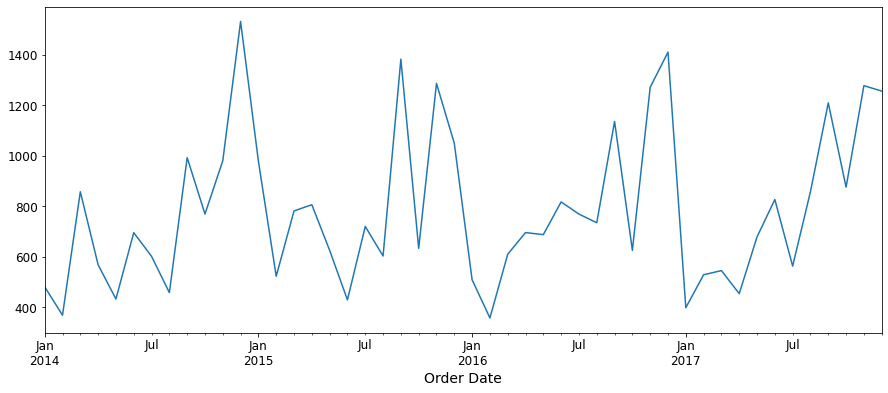

In [11]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

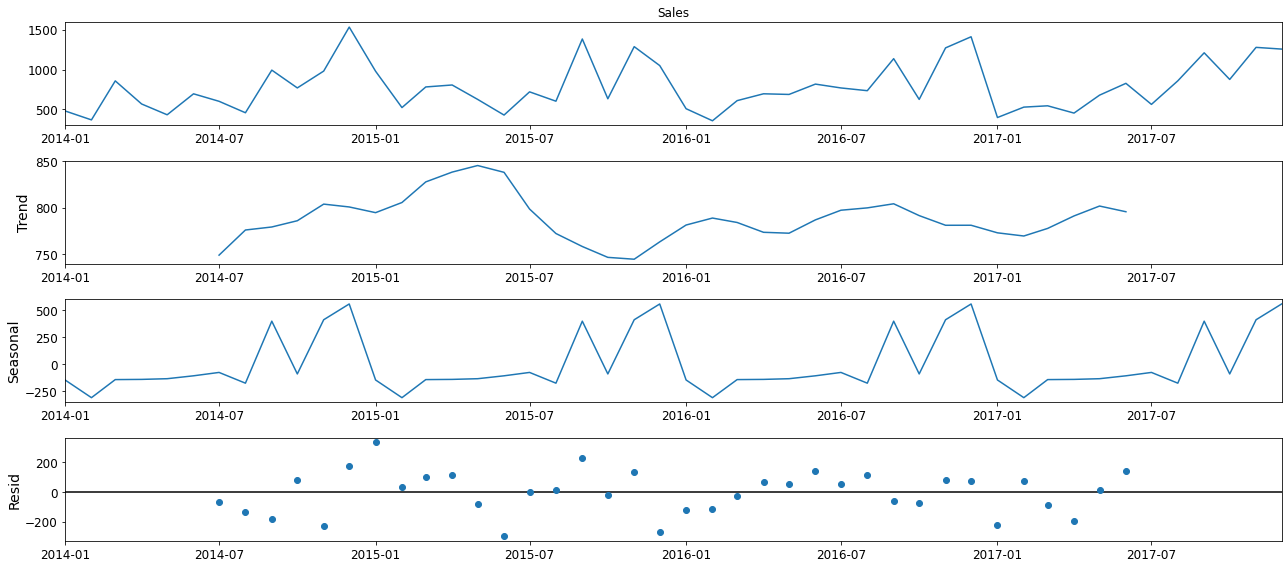

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# ARIMA: AutoRegressive Integrated Moving Average

#### ARIMA models are denoted with the notation ARIMA(p, d, q). These 3 parameters account for seasonality, trend, and noise in the data

In [13]:
# Define Range
p = d = q = range(0, 2)
# Cartesian product of input iterables.
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA\n===========================================\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. 
Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

## Optimal Parameters - with the smallest AIC score

In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:780.1038772241183
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028999297056
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:826.0280960823629
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803673495
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758091
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2729.0726182688663


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091676
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673055


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.515736010233
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4020.6534058603174
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769277646
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576530939
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1498.4517007624702
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281714713
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:620.2504538720156
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132002150783
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176709445
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2606.199149573252
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548483838
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806231718204
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774398126
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2780.306655944331
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368416905
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621506612
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1524.450565361116
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751651476
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935375


/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1073.4118340286689
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750656055
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921869636
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442579176
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1269080.5363280233
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3637985658501
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422194967573
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633240705206
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2538.1595470009124
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:304.37537863883983
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188294432
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:239627530.98643145
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611614424
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036585859474
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2018.5832670790448
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901312144


# Fitting the ARIMA Model

#### I have selected the smallest AIC params: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661015010946

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.813      -0.187
ar.S.L12      -0.0036      0.422     -0.008      0.993      -0.831       0.824
ma.S.L12      -0.3011      0.500     -0.602      0.547      -1.281       0.679
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


# Investigate any unusual behavior

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

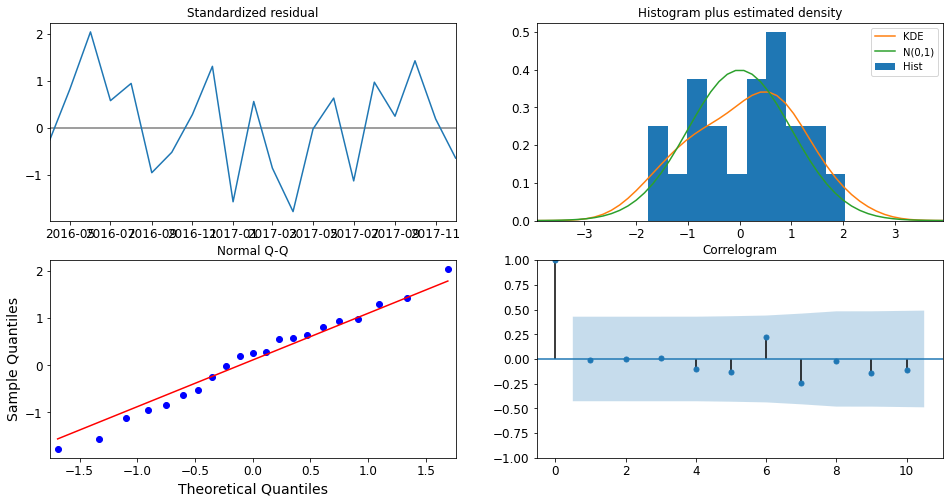

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

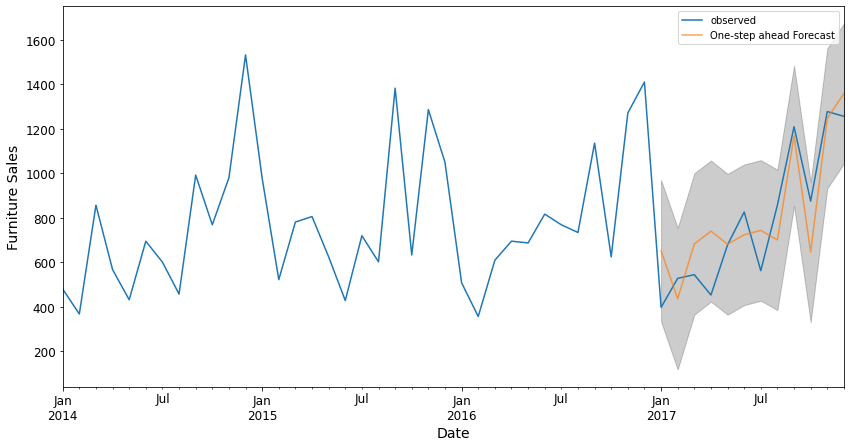

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [18]:
# y_true vs. y_pred
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# MSE
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 25708.77
The Root Mean Squared Error of our forecasts is 160.34


#### The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

#### RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales.

# Producing and visualizing forecasts

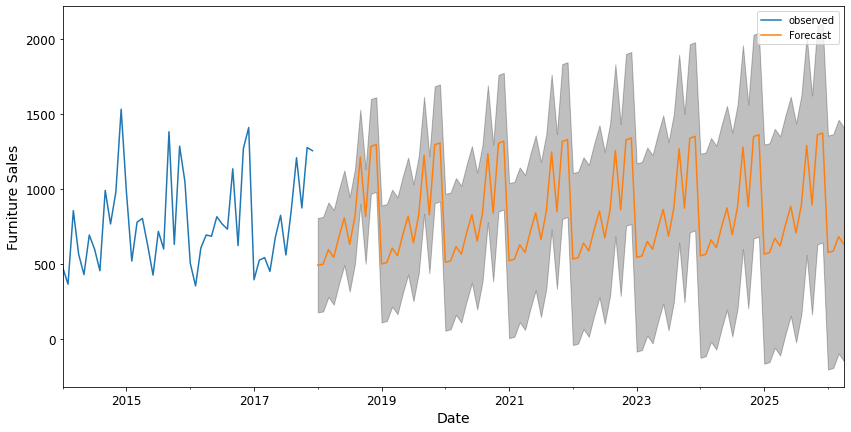

In [19]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of furniture and office supplier.

# Time Series of Furniture vs. Office Supplies

In [20]:
# Furnitures sales
furniture = df.loc[df['Category'] == 'Furniture']
# Office sales
office = df.loc[df['Category'] == 'Office Supplies']
# Compare amount of each of the categories
print("Furniture Shape = ", furniture.shape) 
print("Office Shape = ", office.shape)

Furniture Shape =  (2121, 21)
Office Shape =  (6026, 21)


# Data Exploration

We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.

In [21]:
# Column names
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
        'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Dropping columns from Furnitureand Office categories
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

# Ordering the DataFrmames by Date
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

# Grouping DataFrame by Sum of sales + resetting indexes 
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

# Setting indexes newly
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

# Our current datetime data can be tricky to work with, therefore, we will use the averages 
# daily sales value for that month instead, and we are using the start of each month as the timestamp.
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

# Creating pandas DF for each category
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

# Merging DF's
store = furniture.merge(office, how='inner', on='Order Date')

# Renaming columns
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
# Display the head of the new data
store.head()

/homedtic/ikoren/project/anaconda3/envs/vale3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


### Plot

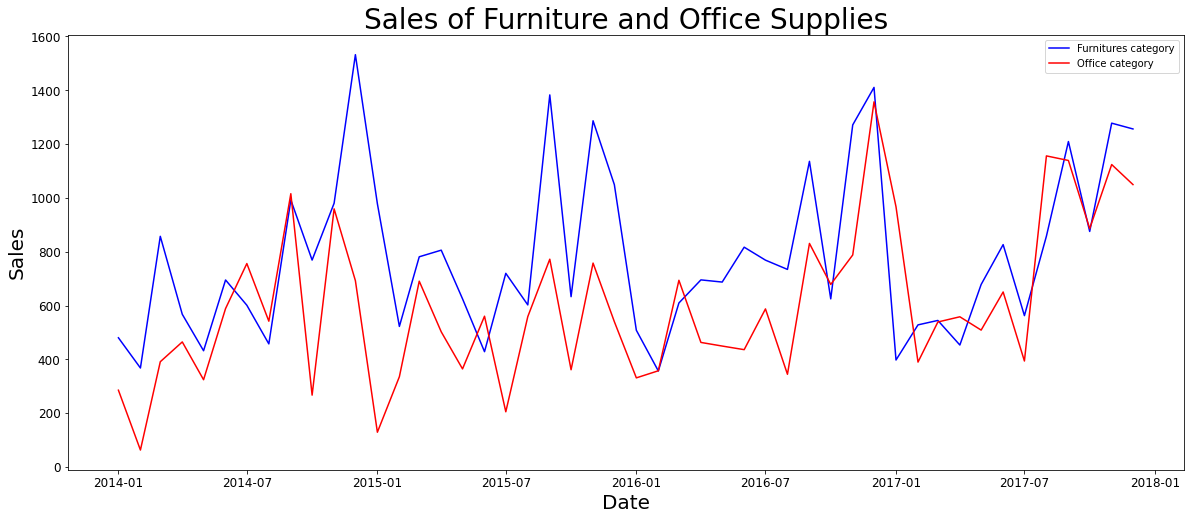

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'Furnitures category')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'Office category')
plt.xlabel('Date', size=20)
plt.ylabel('Sales', size = 20)
plt.title('Sales of Furniture and Office Supplies', size=28)
plt.legend()

#### We observe that sales of furniture and office share a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [23]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office sales first time produced higher sales per day than furnitures sales on:\n==============================================================================\n{}".format(first_date.date()))

Office sales first time produced higher sales per day than furnitures sales on:
2014-07-01


# Time Series Modeling with Prophet

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [24]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [25]:
# Renaming columns for Furniture
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# Renaming columns for Office
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})


# We fit the model by instantiating a new Prophet object. 
# Any settings to the forecasting procedure are passed into the constructor. 
# Then you call its fit method and pass in the historical dataframe.  

furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office_model = Prophet(interval_width=0.95)
office_model.fit(office)

# Predictions are then made on a dataframe with the date column which a prediction has to be made.
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')

# The predict method will assign each row in future a predicted value which it names yhat. 
# If you pass in historical dates, it will provide an in-sample fit. 
# The forecast object here is a new dataframe that includes a column yhat with the forecast, 
# as well as columns for components and uncertainty intervals.
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.predict(office_forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Furnitures Sales')

<Figure size 1296x432 with 0 Axes>

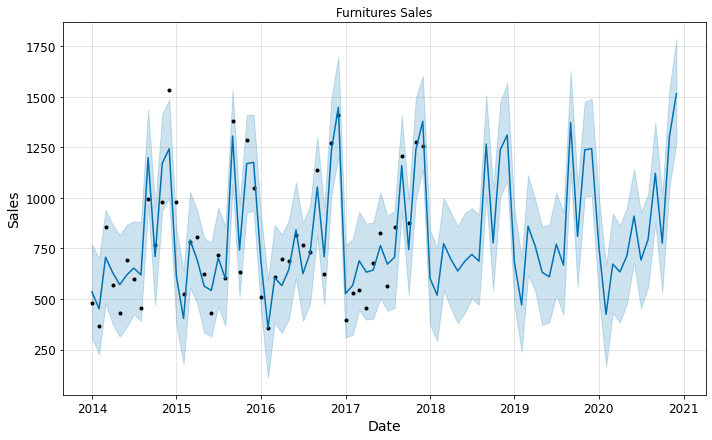

In [26]:
# Plotting model - Furnitures
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furnitures Sales')

Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 1296x432 with 0 Axes>

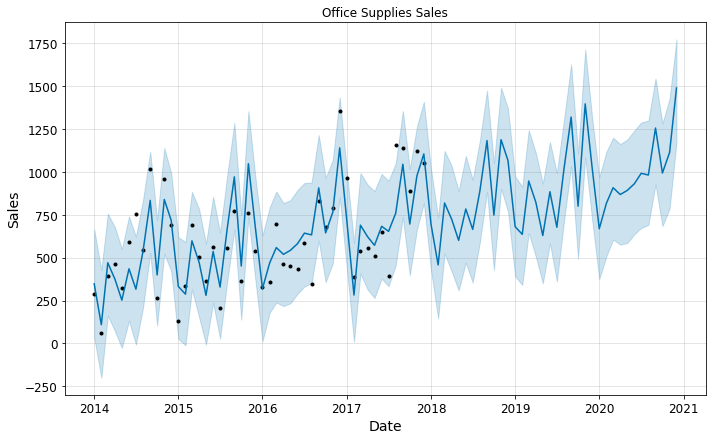

In [27]:
# Plotting model - Office
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales')

# Compare between the forecasts

We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.

In [28]:
# Get features names
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

# Copy the original data in-order not to damage its completeness
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

# Getting the right column names for the copied data
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

# Merge between the datasets
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', 
                    left_on = 'furniture_ds', right_on = 'office_ds')

# Renaming column and dropping date column of the office dataset (Duplicated)
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)

# Printing the head of the new data
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,308.099487,770.756110,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,226.823199,700.965737,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,479.066944,940.270042,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,374.798138,868.273548,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,313.573161,816.729859,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


# Trend and Forecast Visualization

### Trend

Text(0.5, 1.0, 'Furniture vs. Office Supplies Sales Trend')

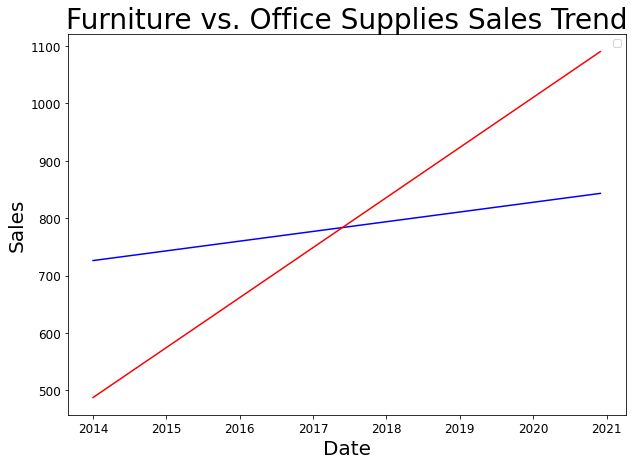

In [30]:
plt.figure(figsize=(10, 7))

# taking the furniture trend 
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
# taking the office products trend
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')

# Plot
plt.legend()
plt.xlabel('Date', size=20)
plt.ylabel('Sales', size=20)
plt.title('Furniture vs. Office Supplies Sales Trend', size = 28)

### Forecast (y_hat)

Text(0.5, 1.0, 'Furniture vs. Office Supplies Estimate')

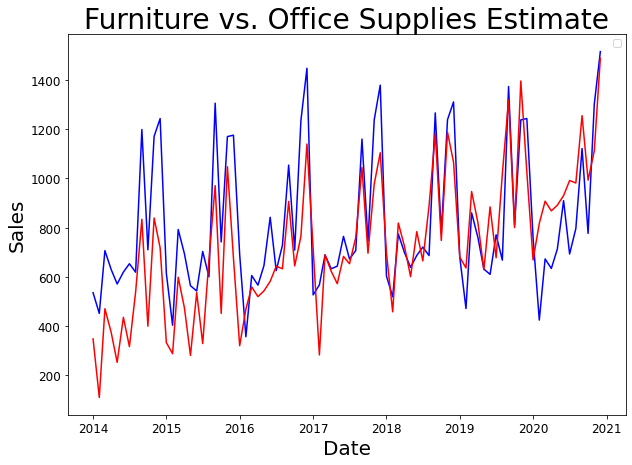

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend() 
plt.xlabel('Date', size=20) 
plt.ylabel('Sales', size=20)
plt.title('Furniture vs. Office Supplies Estimate', size=28)

# Trends and Patterns

### Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

## Trend

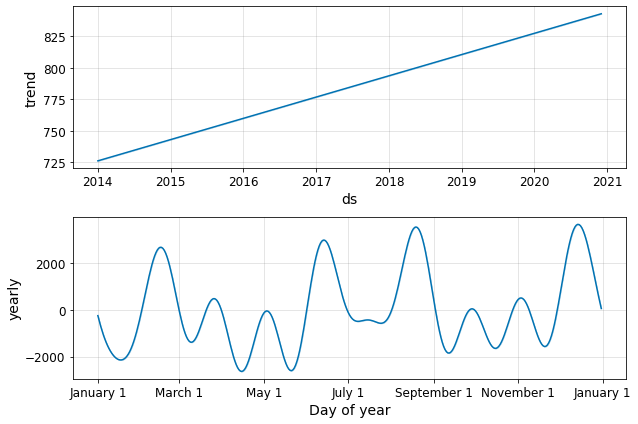

In [35]:
furniture_model.plot_components(furniture_forecast)

## Forecast

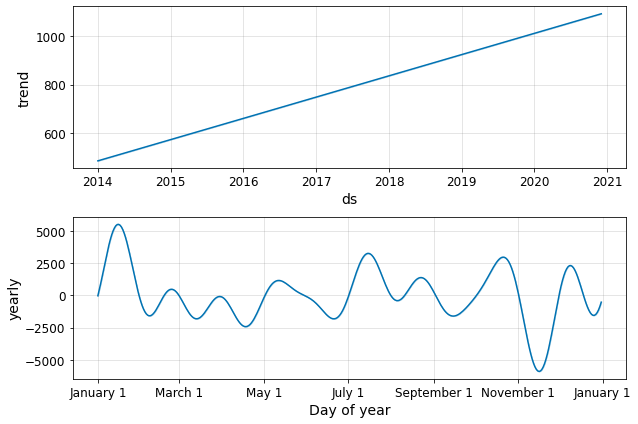

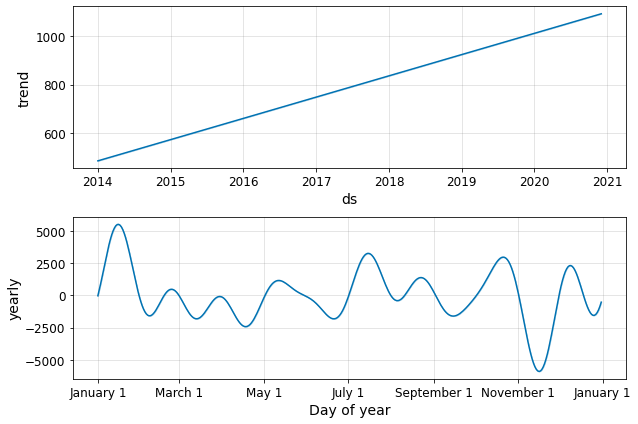

In [37]:
office_model.plot_components(office_forecast)

The sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger. 

The worst month for furniture is April, the worst month for office supplies is February. The best month for furniture is December, and the best month for office supplies is October.

There are many time-series analysis we can explore from now on, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. We have only just started.